# PDE-based image compression

This code is an implementation of the PDE method in equation (7) in the paper:

Galić I., Weickert J., Welk M., Bruhn A., Belyaev A., Seidel HP. (2005) Towards PDE-Based Image Compression. In: Paragios N., Faugeras O., Chan T., Schnörr C. (eds) Variational, Geometric, and Level Set Methods in Computer Vision. VLSM 2005. Lecture Notes in Computer Science, vol 3752. Springer, Berlin, Heidelberg

## 1.- First, load the image to be compressed,

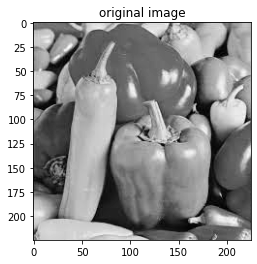

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math

img = cv2.imread('peppers_color.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.show()


## 2.- and find the edges.

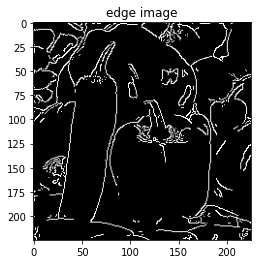

In [2]:
#A new variable "img_edges" is created for the edges of the image 
#img_edges = 255 if the pixel belongs to an edgde
#img_edges = 0 if not
img_edges = cv2.Canny(img,180,200)
plt.imshow(img_edges,cmap='gray')
plt.title('edge image')
plt.show()


## 3.- Create the compressed image
### By adjusting the value of VAL, more or less compression can be obtained.

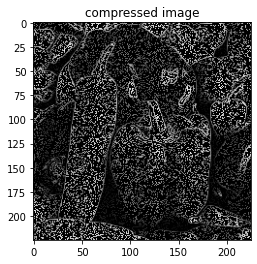

Number of removed pixels: 34859
Total number of pixeles in the image: 50625
Compression ratio:68.85728395061729%


In [3]:
#VAL defines the percentage of pixeles that will be removed from the image
VAL=0.75
m,n = img.shape
var_random=np.random.random_sample((m,n))
#"img_compressed" has all values not in the image edges or randomly selected set to zero
itemindex = np.where((img_edges!=255) & (var_random<VAL))
img_compressed=np.copy(img)
img_compressed[itemindex]=0
plt.imshow(img_compressed,cmap='gray')
plt.title('compressed image')
plt.show()

totalpixels=m*n
removed=len(np.where(img_compressed==0)[0])
ratio= 100*removed/totalpixels   
print('Number of removed pixels: %i' % removed)
print('Total number of pixeles in the image: %i' % totalpixels)
print('Compression ratio:'+ str(ratio) + '%')

## 4.- Now, proceed to decompress the image

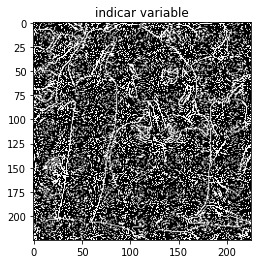

In [4]:
#First, copy img_compressed to img_decompressed
img_decompressed=np.copy(img_compressed)
#and create an indicator variable "cx" with cx=1 if the pixel value is known and 0 if it's unknown
cx=np.ones((m,n))
cx[itemindex]=0
plt.imshow(cx,cmap='gray')
plt.title('indicar variable')
plt.show()

## 6.- Use a PDE method to decompress

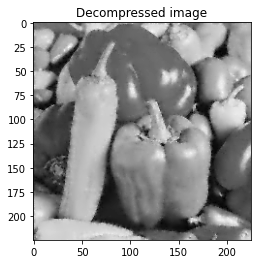

In [5]:
#The following code solves a PDE based on the Heath equation
timestep=0.1
MAX=1000
for k in range(MAX):
    fi = np.vstack ((img_decompressed[1:m,:]-img_decompressed[:m-1,:], np.zeros(n)))
    fj = np.hstack ((img_decompressed[:,1:n]-img_decompressed[:,:n-1], np.zeros(m).reshape(m,1)))
    bi = np.vstack ((np.zeros(n), fi[1:m,:]-fi[:m-1,:]))
    bj = np.hstack ((np.zeros(m).reshape(m,1), fj[:,1:n]-fj[:,:n-1]))
    #compute the Laplacian operator
    Laplacian= bi+bj
    residual = (1-cx)*Laplacian - (cx)*(img_decompressed-img_compressed)
    #update using gradient descent method
    img_decompressed = img_decompressed + timestep*residual
    
# display the result    
plt.imshow(img_decompressed,cmap='gray')
plt.title('Decompressed image')
plt.show()

In [6]:
#Compute the Peak Signal to Noise Ratio (PSNR) 
mse = np.mean( (img - img_decompressed) ** 2 )
if mse == 0:
    print('PSNR = 100')
else:
    PIXEL_MAX = 255.0
    psnr=20 * math.log10(PIXEL_MAX / math.sqrt(mse))
    print('PSNR= %f' % psnr )

PSNR= 28.803382
